<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-09-19 15:53:25
-------------------
qualified stocks: 86
with latest results: 26
still star stocks: 15
-------------------
Initial Investment:  1.22 C
CY Investment:  1.49 C
Reserve:  6.17 L
Current:  1.43 C
-------------------
Today PnL: 40.00 (0.0%)
Current PnL: -16.75 L (-11.27%)
CY Booked + Current PnL: -5.31 L (-3.57%)
-------------------
Total profit:  2.15 L
Total loss:  -18.91 L
-------------------
Total Booked + Current PnL: 21.67 L (17.81%)
Total Booked PnL: 38.42 L (31.57%)
Curr Year Booked PnL: 11.44 L (8.01%)
Prev Year Booked PnL: 26.98 L (22.17%)
Est FTT:  2.24 C
Est FTT PnL: 81.27 L (56.89%)
Deployed:  1.22 C
Current:  1.43 C
CAGR/XIRR %: 9.92%
Row successfully appended and saved to data/myPortfolioDB.csv.


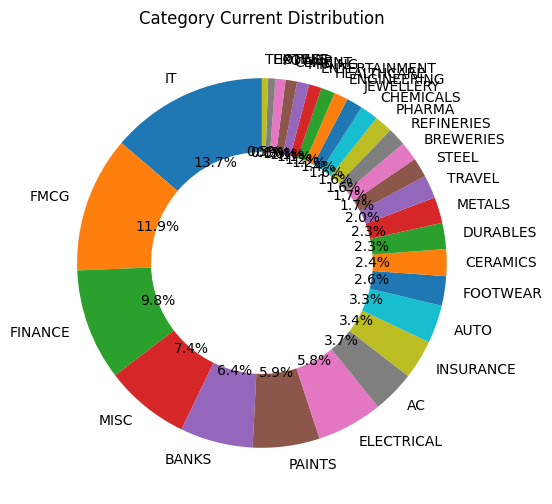

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
14,BLUESTARCO,1646.70,2080.00,13.77,3.50,H-MC,65.0,196380.0,31710.0,11626.0,...,19.26,5.92,26.31,89.0,2.73,1.44,28.78,X40N,AC,NTT
76,TTKPRESTIG,769.29,770.00,101.92,3.71,M-SC,51.0,87023.0,-13754.0,13845.0,...,-13.65,15.91,0.09,245.0,-0.99,0.64,14.33,OX40N,DURABLES,NTT
83,VOLTAS,1278.28,1530.00,1.58,2.68,H-MC,59.0,212985.0,21243.0,16506.0,...,11.08,7.75,19.69,99.0,1.29,1.56,18.63,XY25,AC,NTT
49,NATIONALUM,189.63,244.55,-43.33,7.95,H-MC,65.0,112148.0,11644.0,17461.0,...,11.59,15.57,28.96,79.0,0.67,0.82,49.49,MH,METALS,ATH
56,RELIANCE,1348.50,1533.00,-12.06,4.95,H-LC,56.0,219554.0,9188.0,19584.0,...,4.37,8.92,13.68,37.0,0.47,1.61,21.61,XY25,REFINERIES,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,AWL,315.97,485.00,-65.25,4.16,H-SC,47.0,245387.0,-56364.0,217781.0,...,-18.68,88.75,53.50,116.0,-0.26,1.80,8.99,XY24,FMCG,NTT
64,SIEMENS,3721.90,7969.85,3.29,26.99,H-LC,65.0,166295.0,-19800.0,232198.0,...,-10.64,139.63,114.13,15.0,-0.09,1.22,22.46,AR,ELECTRICAL,ATH
57,REPCOHOME,488.08,880.00,-59.76,6.04,H-SC,54.0,181850.0,-53893.0,243188.0,...,-22.86,133.73,80.30,134.0,-0.22,1.33,23.10,XY24,FINANCE,NTT
10,BANDHANBNK,207.88,400.00,-10.09,5.00,H-SC,52.0,223887.0,-54672.0,312121.0,...,-19.63,139.41,92.42,151.0,-0.18,1.64,29.39,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-37.51,9.85,H-LC,68.0,260971.0,-648.0,119864.0,...,-0.25,45.93,45.57,7.0,-0.01,1.91,11.05,AR,ELECTRICAL,NTT
2,ACC,2579.05,3906.00,-36.77,4.84,M-MC,63.0,137174.0,-51097.0,147970.0,...,-27.14,107.87,51.45,174.0,-0.35,1.00,5.41,XY24,CEMENT,BTT
4,ANGELONE,2329.34,3033.00,5.05,10.85,H-SC,39.0,185861.0,-5145.0,62840.0,...,-2.69,33.81,30.21,157.0,-0.08,1.36,17.63,X40N,FINANCE,NTT
5,ASIANPAINT,2861.00,3465.66,-13.36,7.75,H-LC,45.0,218390.0,-33378.0,86592.0,...,-13.26,39.65,21.13,27.0,-0.39,1.60,17.47,X40,PAINTS,ATH
8,AWL,315.97,485.00,-65.25,4.16,H-SC,47.0,245387.0,-56364.0,217781.0,...,-18.68,88.75,53.50,116.0,-0.26,1.80,8.99,XY24,FMCG,NTT
9,BAJAJHFL,122.26,152.00,-10.84,5.87,H-MC,54.0,187911.0,-12595.0,61372.0,...,-6.28,32.66,24.33,90.0,-0.21,1.37,8.36,X40N,FINANCE,BTT
11,BANKINDIA,116.91,190.00,-27.86,6.34,H-MC,67.0,185283.0,5475.0,106945.0,...,3.05,57.72,62.52,88.0,0.05,1.36,38.17,XR,BANKS,NTT
12,BATAINDIA,1550.24,2096.00,9.17,5.25,M-SC,59.0,102729.0,-25941.0,71243.0,...,-20.16,69.35,35.20,219.0,-0.36,0.75,17.91,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-19.72,5.29,H-MC,44.0,215298.0,-12041.0,60111.0,...,-5.30,27.92,21.14,106.0,-0.20,1.58,21.35,XY24,PAINTS,NTT
14,BLUESTARCO,1646.70,2080.00,13.77,3.50,H-MC,65.0,196380.0,31710.0,11626.0,...,19.26,5.92,26.31,89.0,2.73,1.44,28.78,X40N,AC,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,124.76,7.88,H-SC,47.0,152506.0,-65990.0,94188.0,...,-30.20,61.76,12.90,153.0,-0.70,1.12,16.09,OX40N,FINANCE,NTT
18,CERA,7647.97,9475.0,-21.00,2.13,H-SC,41.0,144072.0,-31831.0,73851.0,...,-18.10,51.26,23.89,149.0,-0.43,1.05,24.43,OX40N,CERAMICS,NTT
37,INDIGOPNTS,1407.73,1408.0,112.61,2.28,M-SC,45.0,139252.0,-35307.0,35342.0,...,-20.23,25.38,0.02,221.0,-1.00,1.02,21.13,OX40N,PAINTS,NTT
42,JCHAC,2282.24,2282.0,20095.65,1.63,M-SC,59.0,98694.0,-29111.0,29095.0,...,-22.78,29.48,-0.01,232.0,-1.00,0.72,11.76,OX40N,AC,NTT
44,KANSAINER,299.63,340.0,-66.99,1.27,H-SC,62.0,226665.0,-43002.0,79333.0,...,-15.95,35.00,13.47,138.0,-0.54,1.66,14.64,XY24,PAINTS,NTT
53,RAJESHEXPO,517.65,518.0,1867.17,2.64,L-SC,63.0,53670.0,-83507.0,83596.0,...,-60.88,155.76,0.07,267.0,-1.00,0.39,33.48,OX40N,JEWELLERY,NTT
62,SFL,1016.35,1287.0,33.01,8.00,M-SC,39.0,175659.0,-86559.0,156389.0,...,-33.01,89.03,26.63,229.0,-0.55,1.29,9.22,XY24,MISC,NTT
65,SIS,435.42,528.0,2070.98,4.87,H-SC,33.0,87618.0,-23414.0,47025.0,...,-21.09,53.67,21.26,156.0,-0.50,0.64,18.38,OX40N,MISC,NTT
69,SYMPHONY,1306.42,1306.0,-41.33,18.18,M-SC,46.0,125000.0,-46141.0,46088.0,...,-26.96,36.87,-0.03,196.0,-1.00,0.91,2.47,OX40N,DURABLES,NTT
71,TATAELXSI,6938.68,9161.0,-19.68,7.44,H-MC,54.0,108728.0,-23107.0,65335.0,...,-17.53,60.09,32.03,98.0,-0.35,0.80,21.78,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2579.05,3906.00,-36.77,4.84,M-MC,63.0,137174.0,-51097.0,147970.0,...,-27.14,107.87,51.45,174.0,-0.35,1.00,5.41,XY24,CEMENT,BTT
7,ATULAUTO,624.44,844.00,3791.89,5.38,M-SC,59.0,121328.0,-26040.0,77856.0,...,-17.67,64.17,35.16,236.0,-0.33,0.89,23.92,XY24,AUTO,NTT
8,AWL,315.97,485.00,-65.25,4.16,H-SC,47.0,245387.0,-56364.0,217781.0,...,-18.68,88.75,53.50,116.0,-0.26,1.80,8.99,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,-10.09,5.00,H-SC,52.0,223887.0,-54672.0,312121.0,...,-19.63,139.41,92.42,151.0,-0.18,1.64,29.39,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-19.72,5.29,H-MC,44.0,215298.0,-12041.0,60111.0,...,-5.30,27.92,21.14,106.0,-0.20,1.58,21.35,XY24,PAINTS,NTT
16,CAMPUS,294.86,393.00,-22.64,0.76,M-SC,66.0,161226.0,-6549.0,62394.0,...,-3.90,38.70,33.28,210.0,-0.10,1.18,24.96,XY24,FOOTWEAR,NTT
20,COALINDIA,406.65,497.97,8.79,2.63,L-LC,61.0,145965.0,-4496.0,38287.0,...,-2.99,26.23,22.46,167.0,-0.12,1.07,14.55,XY25,MINING,ATH
22,COLPAL,2714.63,3767.14,0.18,7.24,H-MC,49.0,182356.0,-29385.0,111474.0,...,-13.88,61.13,38.77,84.0,-0.26,1.33,8.54,XY25,FMCG,ATH
23,DABUR,505.20,735.00,-3.95,6.93,H-MC,53.0,208826.0,11798.0,77829.0,...,5.99,37.27,45.49,102.0,0.15,1.53,19.81,XY24,FMCG,BTT
25,EASEMYTRIP,18.12,26.40,-11.01,28.62,M-SC,48.0,85773.0,-91042.0,171838.0,...,-51.49,200.34,45.70,197.0,-0.53,0.63,5.65,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-37.51,9.85,H-LC,68.0,260971.0,-648.0,119864.0,...,-0.25,45.93,45.57,7.0,-0.01,1.91,11.05,AR,ELECTRICAL,NTT
3,ALKYLAMINE,2347.98,4546.37,-5.25,12.50,H-SC,49.0,89354.0,-11609.0,106144.0,...,-11.50,118.79,93.63,148.0,-0.11,0.65,33.09,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,7038.89,5.21,L-SC,66.0,78310.0,-15500.0,92116.0,...,-16.52,117.63,81.67,269.0,-0.17,0.57,51.65,XR,CERAMICS,NTT
11,BANKINDIA,116.91,190.00,-27.86,6.34,H-MC,67.0,185283.0,5475.0,106945.0,...,3.05,57.72,62.52,88.0,0.05,1.36,38.17,XR,BANKS,NTT
15,BSOFT,551.58,836.99,-13.63,14.75,H-SC,51.0,97270.0,-43383.0,116160.0,...,-30.84,119.42,51.74,131.0,-0.37,0.71,10.92,XR,IT,ATH
21,COFFEEDAY,59.14,80.00,-41.65,42.27,L-SC,52.0,85094.0,-28455.0,68509.0,...,-25.06,80.51,35.27,268.0,-0.42,0.62,108.27,XR,HOTELS,NTT
24,DEN,52.79,75.00,107.25,2.88,M-SC,51.0,58160.0,-26304.0,61842.0,...,-31.14,106.33,42.07,237.0,-0.43,0.43,23.51,AR,ENTERTAINMENT,NTT
27,HAPPSTMNDS,801.03,1488.71,-13.71,10.22,H-SC,52.0,92960.0,-35205.0,145231.0,...,-27.47,156.23,85.85,132.0,-0.24,0.68,7.56,AR,IT,ATH
28,HATHWAY,18.12,31.40,950.72,1.48,H-SC,59.0,90480.0,-18240.0,97917.0,...,-16.78,108.22,73.29,161.0,-0.19,0.66,21.03,XR,ENTERTAINMENT,NTT
35,IEX,147.35,219.00,-29.23,16.91,H-SC,57.0,202234.0,2280.0,94949.0,...,1.14,46.95,48.63,115.0,0.02,1.48,12.82,XR,MISC,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.04
1,20,36.48
2,30,51.10


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,46.36
LC,30.43
MC,23.23


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,29.34
X40,15.43
X40N,11.94
XR,11.76
AR,8.88
XY25,8.24
OX40N,8.19
X200,1.81
MH,1.71


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,31.12
H-LC,23.71
H-MC,20.20
M-SC,13.66
M-LC,5.65
M-MC,2.72
L-SC,1.58
L-LC,1.07
L-MC,0.31


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          10.34
X40       H-LC           9.34
XY24      M-SC           6.73
XR        H-SC           6.47
X40       H-MC           5.34
AR        H-SC           4.76
XY24      H-MC           4.51
X40N      H-MC           4.48
          H-LC           3.79
OX40N     H-SC           3.71
X40N      H-SC           3.67
XY25      H-LC           3.65
OX40N     M-SC           3.29
AR        H-LC           3.13
XY24      M-LC           3.05
XY25      H-MC           2.89
XY24      M-MC           2.72
          H-LC           1.99
X200      H-LC           1.81
X5K       M-LC           1.44
XR        H-MC           1.36
SR        H-SC           1.28
XR        M-SC           1.27
          L-SC           1.19
          M-LC           1.16
XY25      L-LC           1.07
AR        M-SC           0.99
MH        H-SC           0.89
          H-MC           0.82
OX40N     H-MC           0.80
X40       M-SC           0.75
XY25      M-SC           0.63
OX40N     L-SC           0.39
XR        L-MC           0.31
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
IT,13.75,-11.89,72.90
FMCG,11.89,-4.09,40.51
FINANCE,9.76,-15.27,60.41
MISC,7.43,-13.28,76.25
BANKS,6.37,-14.64,74.95
PAINTS,5.86,-15.47,32.69
ELECTRICAL,5.77,-4.61,62.27
AC,3.72,4.69,11.26
INSURANCE,3.43,-7.24,44.02


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,55.65,7602794.0,-9.96,-756889.0,55.53,4221954.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,56.39,7704665.0,-3.69,-284185.0,42.27,3256529.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2837342.0
XR,1299857.0
AR,1285960.0
X40,741391.0
X40N,573321.0
OX40N,526728.0
XY25,338237.0
SR,245654.0
X5K,120572.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3621797.0
M-SC,1379600.0
H-LC,1168863.0
H-MC,929974.0
M-LC,377927.0
M-MC,306047.0
L-SC,244221.0
L-MC,60171.0
L-LC,38287.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1240988.0
          M-SC           798679.0
AR        H-SC           772340.0
XR        H-SC           756286.0
X40       H-LC           461053.0
AR        H-LC           352062.0
XY24      M-MC           306047.0
X40N      H-SC           290166.0
XY24      H-MC           275835.0
OX40N     H-SC           253427.0
SR        H-SC           245654.0
X40       H-MC           209095.0
AR        M-SC           161558.0
XR        L-SC           160625.0
X40N      H-LC           155832.0
XY24      M-LC           155599.0
XY25      H-MC           127980.0
X40N      H-MC           127323.0
OX40N     M-SC           124370.0
X5K       M-LC           120572.0
XR        M-SC           114074.0
XY25      M-SC           109676.0
XR        H-MC           106945.0
          M-LC           101756.0
OX40N     L-SC            83596.0
X200      H-LC            77428.0
X40       M-SC            71243.0
OX40N     H-MC            65335.0
MH        H-SC            62936.0
XY25      H-LC            62294.0
XY24      H-LC            60194.0
XR        L-MC            60171.0
XY25      L-LC            38287.0
MH        H-MC            17461.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,30
M-SC,17
H-MC,15
H-LC,13
M-LC,4
L-SC,3
M-MC,2
L-LC,1
L-MC,1
